In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
%%time
close_domain_10 = pd.read_csv('./saved-files/threshold-10/close-domain-threshold-10-LF.csv')
close_domain_15 = pd.read_csv('./saved-files/threshold-15/close-domain-threshold-15-LF.csv')
close_domain_20 = pd.read_csv('./saved-files/threshold-20/close-domain-threshold-20-LF.csv')

distant_domain_10 = pd.read_csv('./saved-files/threshold-10/distant-domain-threshold-10-LF.csv')
distant_domain_15 = pd.read_csv('./saved-files/threshold-15/distant-domain-threshold-15-LF.csv')
distant_domain_20 = pd.read_csv('./saved-files/threshold-20/distant-domain-threshold-20-LF.csv')

CPU times: user 15 ms, sys: 6.28 ms, total: 21.3 ms
Wall time: 91.4 ms


In [4]:
len(close_domain_10), len(close_domain_15), len(close_domain_20)

(259, 528, 340)

In [5]:
len(distant_domain_10), len(distant_domain_15), len(distant_domain_20)

(899, 1236, 875)

In [6]:
# Changing to datetime format
close_domain_10['timestr'] = pd.to_datetime(close_domain_10['timestr'])
close_domain_15['timestr'] = pd.to_datetime(close_domain_15['timestr'])
close_domain_20['timestr'] = pd.to_datetime(close_domain_20['timestr'])

# Changing to datetime format
distant_domain_10['timestr'] = pd.to_datetime(distant_domain_10['timestr'])
distant_domain_15['timestr'] = pd.to_datetime(distant_domain_15['timestr'])
distant_domain_20['timestr'] = pd.to_datetime(distant_domain_20['timestr'])

In [7]:
# Selecting time from 4am on the 13th March to 5am on the 14th March
close_domain_10 = close_domain_10[close_domain_10['timestr'] >= '2020-03-13 04:00:00']
close_domain_15 = close_domain_15[close_domain_15['timestr'] >= '2020-03-13 04:00:00']
close_domain_20 = close_domain_20[close_domain_20['timestr'] >= '2020-03-13 04:00:00']

distant_domain_10 = distant_domain_10[distant_domain_10['timestr'] >= '2020-03-13 04:00:00']
distant_domain_15 = distant_domain_15[distant_domain_15['timestr'] >= '2020-03-13 04:00:00']
distant_domain_20 = distant_domain_20[distant_domain_20['timestr'] >= '2020-03-13 04:00:00']

In [8]:
# reset index for close domain
close_domain_10 = close_domain_10.reset_index(drop=True)
close_domain_15 = close_domain_15.reset_index(drop=True)
close_domain_20 = close_domain_20.reset_index(drop=True)

# reset index for distant domain
distant_domain_10 = distant_domain_10.reset_index(drop=True)
distant_domain_15 = distant_domain_15.reset_index(drop=True)
distant_domain_20 = distant_domain_20.reset_index(drop=True)

In [9]:
len(close_domain_10), len(close_domain_15), len(close_domain_20)

(259, 528, 340)

In [10]:
len(distant_domain_10), len(distant_domain_15), len(distant_domain_20)

(899, 1236, 875)

In [11]:
close_domain_10.head()

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,...,longitude,cell,time_cell,distance,mean dBZ,max dBZ,area($km^2$),landfall,relative_time,relative-time-to-LF-close
0,3,39,250.423362,318.045479,30,10,350,2020-03-13 04:15:00,2020-03-13 04:15:00,-2.310423e+06,...,15.808867,253,0 days 00:00:00,19.221204,12.708913,36.584485,37.809595,True,0,0
1,3,41,260.495928,309.864754,43,10,352,2020-03-13 04:15:00,2020-03-13 04:15:00,-2.320496e+06,...,15.583813,255,0 days 00:00:00,31.680540,12.708913,36.584485,39.799761,False,10,10
2,4,46,260.955610,310.205639,54,10,457,2020-03-13 04:20:00,2020-03-13 04:20:00,-2.320956e+06,...,15.591049,255,0 days 00:05:00,31.958503,12.845599,38.092506,67.658450,False,5,5
3,5,43,259.637361,310.448155,8,10,562,2020-03-13 04:25:00,2020-03-13 04:25:00,-2.319637e+06,...,15.600140,255,0 days 00:10:00,30.650596,13.138674,36.584485,18.903445,True,0,0
4,6,55,280.125754,284.112193,27,10,680,2020-03-13 04:30:00,2020-03-13 04:30:00,-2.340126e+06,...,14.911974,393,0 days 00:00:00,62.126223,13.454442,38.092506,30.845914,True,0,0


In [12]:
# fig, ax = plt.subplots(figsize=(12, 7))
# X=np.arange(np.min(close_domain_10['relative-time-to-radar']), np.max(close_domain_10['relative-time-to-radar']+1), 5)

# for index, cell_ids in enumerate(np.unique(close_domain_10['cell'])):
#     close_cell_number10 = close_domain_10[close_domain_10['cell'] == cell_ids]
# #     # cell_number15 = first_landfall_threshold_15[first_landfall_threshold_15['cell'] == cell_ids]
# #     # cell_number20 = first_landfall_threshold_20[first_landfall_threshold_20['cell'] == cell_ids]
#     ax.plot(close_cell_number10['relative-time-to-radar'], close_cell_number10['max dBZ'])

# # # set limit
# ax.set_xlim(np.min(close_domain_10['relative-time-to-radar']), np.max(close_domain_10['relative-time-to-radar']))
# # # # set xticks and yticks
# ax.set_xticks(X)
# # # ax.set_yticks(Y)
# ax.invert_xaxis();
# ax.set_xlabel('radar relative time (mins)', fontsize=15)
# ax.set_ylabel('max reflectivity (dBz)', fontsize=15)
# ax.set_title('CLOSE DOMAIN', fontweight='bold', fontsize=18)
# plt.grid(color='gray', alpha=0.1)
# # ax.legend(loc=3)

# threshold 10 | close and distant domain

In [13]:
# max dBZ
mean_max_dBZ_close_domain_10 = []
std_max_dBZ_close_domain_10 = []
rel_times_close_domain_10 = []

# mean dBZ
mean_mean_dBZ_close_domain_10 = []
std_mean_dBZ_close_domain_10 = []
rel_times1_close_domain_10 = []

# area
percentiles_25_area_close_domain_10 = []
percentiles_50_area_close_domain_10 = []
percentiles_75_area_close_domain_10 = []
rel_times_area_close_domain_10 = []

for indexes, time in enumerate(np.unique(close_domain_10['relative-time-to-LF-close'])):
    # Sorting based on same relative times
    sort_time_close_domain_10 = close_domain_10[close_domain_10['relative-time-to-LF-close'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_close_domain_10 = np.mean(sort_time_close_domain_10['max dBZ'].values)
    means_close_domain_10 = np.mean(sort_time_close_domain_10['mean dBZ'].values)

    std_close_domain_10 = np.std(sort_time_close_domain_10['max dBZ'].values)
    stds_close_domain_10 = np.std(sort_time_close_domain_10['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_close_domain_10 = np.nanpercentile(sort_time_close_domain_10['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_close_domain_10 = np.nanpercentile(sort_time_close_domain_10['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_close_domain_10 = np.nanpercentile(sort_time_close_domain_10['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_close_domain_10.append(percentile_25_close_domain_10)
    # 50th percentile
    percentiles_50_area_close_domain_10.append(percentile_50_close_domain_10)
    # 75th percentile
    percentiles_75_area_close_domain_10.append(percentile_75_close_domain_10)
    
    mean_max_dBZ_close_domain_10.append(mean_close_domain_10)
    mean_mean_dBZ_close_domain_10.append(means_close_domain_10)
    
    std_max_dBZ_close_domain_10.append(std_close_domain_10)
    std_mean_dBZ_close_domain_10.append(stds_close_domain_10)
    
    rel_time_close_domain_10 = np.mean(sort_time_close_domain_10['relative-time-to-LF-close'].values)
    rel_times_close_domain_10.append(rel_time_close_domain_10)
    rel_times1_close_domain_10.append(rel_time_close_domain_10)
    # time
    rel_times_area_close_domain_10.append(rel_time_close_domain_10)

In [14]:
# max dBZ
mean_max_dBZ_distant_domain_10 = []
std_max_dBZ_distant_domain_10 = []
rel_times_distant_domain_10 = []

# mean dBZ
mean_mean_dBZ_distant_domain_10 = []
std_mean_dBZ_distant_domain_10 = []
rel_times1_distant_domain_10 = []

# area
percentiles_25_area_distant_domain_10 = []
percentiles_50_area_distant_domain_10 = []
percentiles_75_area_distant_domain_10 = []
rel_times_area_distant_domain_10 = []

for indexes, time in enumerate(np.unique(distant_domain_10['relative-time-to-LF-distant'])):
    # Sorting based on same relative times
    sort_time_distant_domain_10 = distant_domain_10[distant_domain_10['relative-time-to-LF-distant'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_distant_domain_10 = np.mean(sort_time_distant_domain_10['max dBZ'].values)
    means_distant_domain_10 = np.mean(sort_time_distant_domain_10['mean dBZ'].values)

    std_distant_domain_10 = np.std(sort_time_distant_domain_10['max dBZ'].values)
    stds_distant_domain_10 = np.std(sort_time_distant_domain_10['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_distant_domain_10 = np.nanpercentile(sort_time_distant_domain_10['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_distant_domain_10 = np.nanpercentile(sort_time_distant_domain_10['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_distant_domain_10 = np.nanpercentile(sort_time_distant_domain_10['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_distant_domain_10.append(percentile_25_distant_domain_10)
    # 50th percentile
    percentiles_50_area_distant_domain_10.append(percentile_50_distant_domain_10)
    # 75th percentile
    percentiles_75_area_distant_domain_10.append(percentile_75_distant_domain_10)
    
    mean_max_dBZ_distant_domain_10.append(mean_distant_domain_10)
    mean_mean_dBZ_distant_domain_10.append(means_distant_domain_10)
    
    std_max_dBZ_distant_domain_10.append(std_distant_domain_10)
    std_mean_dBZ_distant_domain_10.append(stds_distant_domain_10)
    
    rel_time_distant_domain_10 = np.mean(sort_time_distant_domain_10['relative-time-to-LF-distant'].values)
    rel_times_distant_domain_10.append(rel_time_distant_domain_10)
    rel_times1_distant_domain_10.append(rel_time_distant_domain_10)
    # time
    rel_times_area_distant_domain_10.append(rel_time_distant_domain_10)

# threshold 15 | close and distant domain

In [15]:
# max dBZ
mean_max_dBZ_close_domain_15 = []
std_max_dBZ_close_domain_15 = []
rel_times_close_domain_15 = []

# mean dBZ
mean_mean_dBZ_close_domain_15 = []
std_mean_dBZ_close_domain_15 = []
rel_times1_close_domain_15 = []

# area
percentiles_25_area_close_domain_15 = []
percentiles_50_area_close_domain_15 = []
percentiles_75_area_close_domain_15 = []
rel_times_area_close_domain_15 = []

for indexes, time in enumerate(np.unique(close_domain_15['relative-time-to-LF-close'])):
    # Sorting based on same relative times
    sort_time_close_domain_15 = close_domain_15[close_domain_15['relative-time-to-LF-close'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_close_domain_15 = np.mean(sort_time_close_domain_15['max dBZ'].values)
    means_close_domain_15 = np.mean(sort_time_close_domain_15['mean dBZ'].values)

    std_close_domain_15 = np.std(sort_time_close_domain_15['max dBZ'].values)
    stds_close_domain_15 = np.std(sort_time_close_domain_15['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_close_domain_15 = np.nanpercentile(sort_time_close_domain_15['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_close_domain_15 = np.nanpercentile(sort_time_close_domain_15['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_close_domain_15 = np.nanpercentile(sort_time_close_domain_15['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_close_domain_15.append(percentile_25_close_domain_15)
    # 50th percentile
    percentiles_50_area_close_domain_15.append(percentile_50_close_domain_15)
    # 75th percentile
    percentiles_75_area_close_domain_15.append(percentile_75_close_domain_15)
    
    mean_max_dBZ_close_domain_15.append(mean_close_domain_15)
    mean_mean_dBZ_close_domain_15.append(means_close_domain_15)
    
    std_max_dBZ_close_domain_15.append(std_close_domain_15)
    std_mean_dBZ_close_domain_15.append(stds_close_domain_15)
    
    rel_time_close_domain_15 = np.mean(sort_time_close_domain_15['relative-time-to-LF-close'].values)
    rel_times_close_domain_15.append(rel_time_close_domain_15)
    rel_times1_close_domain_15.append(rel_time_close_domain_15)
    # time
    rel_times_area_close_domain_15.append(rel_time_close_domain_15)

/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [16]:
# max dBZ
mean_max_dBZ_distant_domain_15 = []
std_max_dBZ_distant_domain_15 = []
rel_times_distant_domain_15 = []

# mean dBZ
mean_mean_dBZ_distant_domain_15 = []
std_mean_dBZ_distant_domain_15 = []
rel_times1_distant_domain_15 = []

# area
percentiles_25_area_distant_domain_15 = []
percentiles_50_area_distant_domain_15 = []
percentiles_75_area_distant_domain_15 = []
rel_times_area_distant_domain_15 = []

for indexes, time in enumerate(np.unique(distant_domain_15['relative-time-to-LF-distant'])):
    # Sorting based on same relative times
    sort_time_distant_domain_15 = distant_domain_15[distant_domain_15['relative-time-to-LF-distant'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_distant_domain_15 = np.mean(sort_time_distant_domain_15['max dBZ'].values)
    means_distant_domain_15 = np.mean(sort_time_distant_domain_15['mean dBZ'].values)

    std_distant_domain_15 = np.std(sort_time_distant_domain_15['max dBZ'].values)
    stds_distant_domain_15 = np.std(sort_time_distant_domain_15['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_distant_domain_15 = np.nanpercentile(sort_time_distant_domain_15['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_distant_domain_15 = np.nanpercentile(sort_time_distant_domain_15['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_distant_domain_15 = np.nanpercentile(sort_time_distant_domain_15['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_distant_domain_15.append(percentile_25_distant_domain_15)
    # 50th percentile
    percentiles_50_area_distant_domain_15.append(percentile_50_distant_domain_15)
    # 75th percentile
    percentiles_75_area_distant_domain_15.append(percentile_75_distant_domain_15)
    
    mean_max_dBZ_distant_domain_15.append(mean_distant_domain_15)
    mean_mean_dBZ_distant_domain_15.append(means_distant_domain_15)
    
    std_max_dBZ_distant_domain_15.append(std_distant_domain_15)
    std_mean_dBZ_distant_domain_15.append(stds_distant_domain_15)
    
    rel_time_distant_domain_15 = np.mean(sort_time_distant_domain_15['relative-time-to-LF-distant'].values)
    rel_times_distant_domain_15.append(rel_time_distant_domain_15)
    rel_times1_distant_domain_15.append(rel_time_distant_domain_15)
    # time
    rel_times_area_distant_domain_15.append(rel_time_distant_domain_15)

/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


# threshold 20 | close and distant domain

In [17]:
# max dBZ
mean_max_dBZ_close_domain_20 = []
std_max_dBZ_close_domain_20 = []
rel_times_close_domain_20 = []

# mean dBZ
mean_mean_dBZ_close_domain_20 = []
std_mean_dBZ_close_domain_20 = []
rel_times1_close_domain_20 = []

# area
percentiles_25_area_close_domain_20 = []
percentiles_50_area_close_domain_20 = []
percentiles_75_area_close_domain_20 = []
rel_times_area_close_domain_20 = []

for indexes, time in enumerate(np.unique(close_domain_20['relative-time-to-LF-close'])):
    # Sorting based on same relative times
    sort_time_close_domain_20 = close_domain_20[close_domain_20['relative-time-to-LF-close'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_close_domain_20 = np.mean(sort_time_close_domain_20['max dBZ'].values)
    means_close_domain_20 = np.mean(sort_time_close_domain_20['mean dBZ'].values)

    std_close_domain_20 = np.std(sort_time_close_domain_20['max dBZ'].values)
    stds_close_domain_20 = np.std(sort_time_close_domain_20['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_close_domain_20 = np.nanpercentile(sort_time_close_domain_20['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_close_domain_20 = np.nanpercentile(sort_time_close_domain_20['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_close_domain_20 = np.nanpercentile(sort_time_close_domain_20['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_close_domain_20.append(percentile_25_close_domain_20)
    # 50th percentile
    percentiles_50_area_close_domain_20.append(percentile_50_close_domain_20)
    # 75th percentile
    percentiles_75_area_close_domain_20.append(percentile_75_close_domain_20)
    
    mean_max_dBZ_close_domain_20.append(mean_close_domain_20)
    mean_mean_dBZ_close_domain_20.append(means_close_domain_20)
    
    std_max_dBZ_close_domain_20.append(std_close_domain_20)
    std_mean_dBZ_close_domain_20.append(stds_close_domain_20)
    
    rel_time_close_domain_20 = np.mean(sort_time_close_domain_20['relative-time-to-LF-close'].values)
    rel_times_close_domain_20.append(rel_time_close_domain_20)
    rel_times1_close_domain_20.append(rel_time_close_domain_20)
    # time
    rel_times_area_close_domain_20.append(rel_time_close_domain_20)

In [18]:
# max dBZ
mean_max_dBZ_distant_domain_20 = []
std_max_dBZ_distant_domain_20 = []
rel_times_distant_domain_20 = []

# mean dBZ
mean_mean_dBZ_distant_domain_20 = []
std_mean_dBZ_distant_domain_20 = []
rel_times1_distant_domain_20 = []

# area
percentiles_25_area_distant_domain_20 = []
percentiles_50_area_distant_domain_20 = []
percentiles_75_area_distant_domain_20 = []
rel_times_area_distant_domain_20 = []

for indexes, time in enumerate(np.unique(distant_domain_20['relative-time-to-LF-distant'])):
    # Sorting based on same relative times
    sort_time_distant_domain_20 = distant_domain_20[distant_domain_20['relative-time-to-LF-distant'] == time]
    # Find each relative time associated with a particular reflectivity value
   
    mean_distant_domain_20 = np.mean(sort_time_distant_domain_20['max dBZ'].values)
    means_distant_domain_20 = np.mean(sort_time_distant_domain_20['mean dBZ'].values)

    std_distant_domain_20 = np.std(sort_time_distant_domain_20['max dBZ'].values)
    stds_distant_domain_20 = np.std(sort_time_distant_domain_20['mean dBZ'].values)
    
    
    # AREA
    # 25th percentile
    percentile_25_distant_domain_20 = np.nanpercentile(sort_time_distant_domain_20['area($km^2$)'].values, 25)
     # 50th percentile
    percentile_50_distant_domain_20 = np.nanpercentile(sort_time_distant_domain_20['area($km^2$)'].values, 50)
    # 75th percentile
    percentile_75_distant_domain_20 = np.nanpercentile(sort_time_distant_domain_20['area($km^2$)'].values, 75)
    
       
    # 25th percentile
    percentiles_25_area_distant_domain_20.append(percentile_25_distant_domain_20)
    # 50th percentile
    percentiles_50_area_distant_domain_20.append(percentile_50_distant_domain_20)
    # 75th percentile
    percentiles_75_area_distant_domain_20.append(percentile_75_distant_domain_20)
    
    mean_max_dBZ_distant_domain_20.append(mean_distant_domain_20)
    mean_mean_dBZ_distant_domain_20.append(means_distant_domain_20)
    
    std_max_dBZ_distant_domain_20.append(std_distant_domain_20)
    std_mean_dBZ_distant_domain_20.append(stds_distant_domain_20)
    
    rel_time_distant_domain_20 = np.mean(sort_time_distant_domain_20['relative-time-to-LF-distant'].values)
    rel_times_distant_domain_20.append(rel_time_distant_domain_20)
    rel_times1_distant_domain_20.append(rel_time_distant_domain_20)
    # time
    rel_times_area_distant_domain_20.append(rel_time_distant_domain_20)

# Maximum Reflectivity

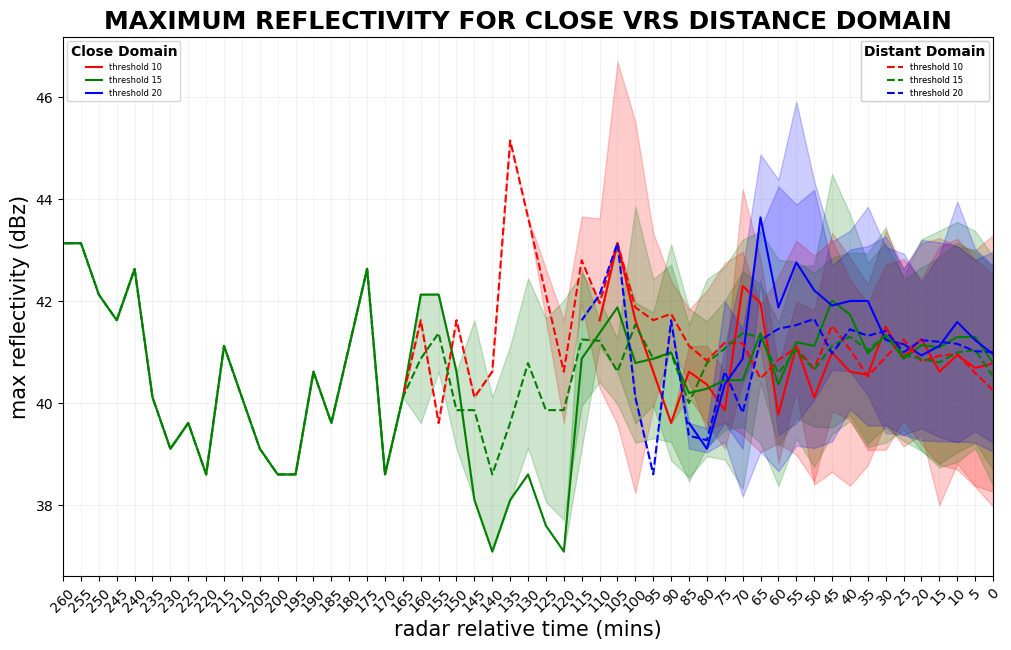

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))

X=np.arange(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']+1), 5)


# close domain
line1 = ax.errorbar(rel_times_close_domain_10, mean_max_dBZ_close_domain_10, fmt='red',label='threshold 10')
line2 = ax.errorbar(rel_times_close_domain_15, mean_max_dBZ_close_domain_15, fmt='green',label='threshold 15')
line3 = ax.errorbar(rel_times_close_domain_20, mean_max_dBZ_close_domain_20, fmt='blue',label='threshold 20')


# distant domain
line4 = ax.errorbar(rel_times_distant_domain_10, mean_max_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--')
line5 = ax.errorbar(rel_times_distant_domain_15, mean_max_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--')
line6 = ax.errorbar(rel_times_distant_domain_20, mean_max_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--')


# close
upper_bound = np.array(mean_max_dBZ_close_domain_10) + np.array(std_max_dBZ_close_domain_10)
lower_bound = np.array(mean_max_dBZ_close_domain_10) - np.array(std_max_dBZ_close_domain_10)
ax.fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')


upper_bound = np.array(mean_max_dBZ_close_domain_15) + np.array(std_max_dBZ_close_domain_15)
lower_bound = np.array(mean_max_dBZ_close_domain_15) - np.array(std_max_dBZ_close_domain_15)
ax.fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')


upper_bound = np.array(mean_max_dBZ_close_domain_20) + np.array(std_max_dBZ_close_domain_20)
lower_bound = np.array(mean_max_dBZ_close_domain_20) - np.array(std_max_dBZ_close_domain_20)
ax.fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_max_dBZ_distant_domain_10) + np.array(std_max_dBZ_distant_domain_10)
lower_bound = np.array(mean_max_dBZ_distant_domain_10) - np.array(std_max_dBZ_distant_domain_10)
ax.fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')


upper_bound = np.array(mean_max_dBZ_distant_domain_15) + np.array(std_max_dBZ_distant_domain_15)
lower_bound = np.array(mean_max_dBZ_distant_domain_15) - np.array(std_max_dBZ_distant_domain_15)
ax.fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')


upper_bound = np.array(mean_max_dBZ_distant_domain_20) + np.array(std_max_dBZ_distant_domain_20)
lower_bound = np.array(mean_max_dBZ_distant_domain_20) - np.array(std_max_dBZ_distant_domain_20)
ax.fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# # set limit
ax.set_xlim(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']))
# # # set xticks and yticks
ax.set_xticks(X)
# # ax.set_yticks(Y)
ax.invert_xaxis();
ax.set_xlabel('radar relative time (mins)', fontsize=15)
ax.set_ylabel('max reflectivity (dBz)', fontsize=15)
ax.set_title('MAXIMUM REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=18)
plt.grid(color='gray', alpha=0.1)

# legend
# Create two separate legends with custom font sizes and weights
legend_close = plt.legend(handles=[line1, line2, line3],
                          title="Close Domain",
                          loc='upper left',
                          fontsize=6,    # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(10)      # Custom title fontsize
legend_close.get_title().set_fontweight('bold') # Custom title fontweight

legend_distant = plt.legend(handles=[line4, line5, line6],
                            title="Distant Domain",
                            loc='upper right',
                            fontsize=6,    # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(10)      # Custom title fontsize
legend_distant.get_title().set_fontweight('bold') # Custom title fontweight

# Add the first legend manually to the current Axes
ax = plt.gca()  # Get the current Axes instance
ax.add_artist(legend_close)

# Add the second legend
plt.gca().add_artist(legend_distant)

plt.xticks(rotation=45);

# # ax.text(x=5, y=31, s='landfall', fontweight='bold');
fig.savefig('./images/distance-vrs-close-domain/max-dBZ(close vs. dist-LF).png', dpi=500, bbox_inches='tight');

# Mean Reflectivity

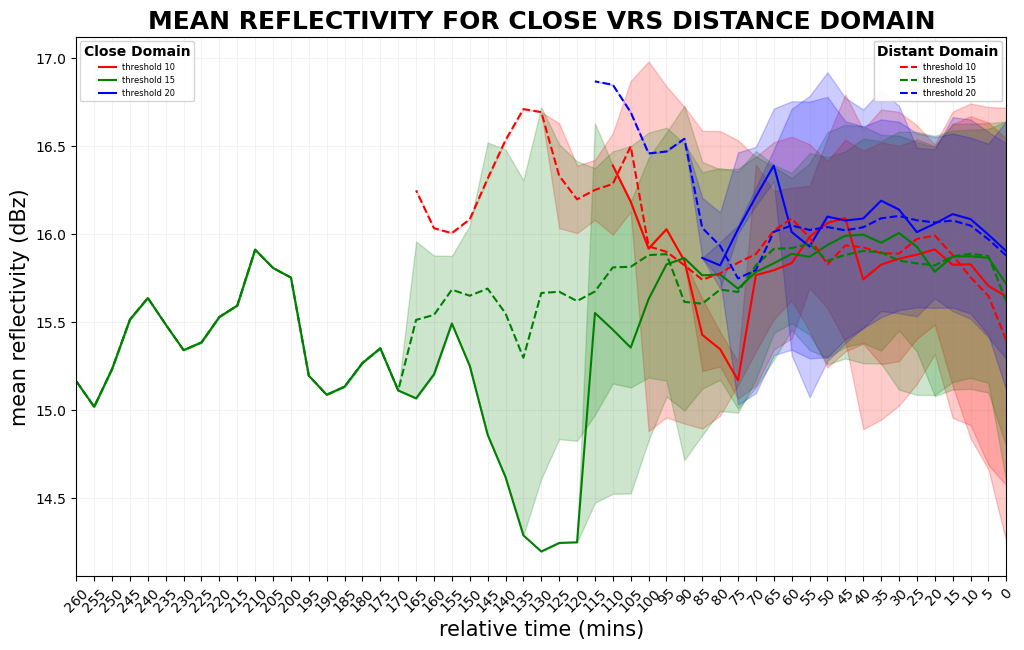

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))

X=np.arange(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']+1), 5)

# for index, cell_ids in enumerate(np.unique(distant_domain_15['cell'])):
#     close_cell_number10 = close_domain_10[close_domain_10['cell'] == cell_ids]
# #     # cell_number15 = first_landfall_threshold_15[first_landfall_threshold_15['cell'] == cell_ids]
# #     # cell_number20 = first_landfall_threshold_20[first_landfall_threshold_20['cell'] == cell_ids]
#     # ax.plot(close_cell_number10['relative-time-to-radar'], close_cell_number10['mean dBZ'])





# close domain
line1 = ax.errorbar(rel_times_close_domain_10, mean_mean_dBZ_close_domain_10, fmt='red',label='threshold 10')
line2 = ax.errorbar(rel_times_close_domain_15, mean_mean_dBZ_close_domain_15, fmt='green',label='threshold 15')
line3 = ax.errorbar(rel_times_close_domain_20, mean_mean_dBZ_close_domain_20, fmt='blue',label='threshold 20')


# distant domain
line4 = ax.errorbar(rel_times_distant_domain_10, mean_mean_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--')
line5 = ax.errorbar(rel_times_distant_domain_15, mean_mean_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--')
line6 = ax.errorbar(rel_times_distant_domain_20, mean_mean_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--')


# close
upper_bound = np.array(mean_mean_dBZ_close_domain_10) + np.array(std_mean_dBZ_close_domain_10)
lower_bound = np.array(mean_mean_dBZ_close_domain_10) - np.array(std_mean_dBZ_close_domain_10)
ax.fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')


upper_bound = np.array(mean_mean_dBZ_close_domain_15) + np.array(std_mean_dBZ_close_domain_15)
lower_bound = np.array(mean_mean_dBZ_close_domain_15) - np.array(std_mean_dBZ_close_domain_15)
ax.fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')


upper_bound = np.array(mean_mean_dBZ_close_domain_20) + np.array(std_mean_dBZ_close_domain_20)
lower_bound = np.array(mean_mean_dBZ_close_domain_20) - np.array(std_mean_dBZ_close_domain_20)
ax.fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_mean_dBZ_distant_domain_10) + np.array(std_mean_dBZ_distant_domain_10)
lower_bound = np.array(mean_mean_dBZ_distant_domain_10) - np.array(std_mean_dBZ_distant_domain_10)
ax.fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')


upper_bound = np.array(mean_mean_dBZ_distant_domain_15) + np.array(std_mean_dBZ_distant_domain_15)
lower_bound = np.array(mean_mean_dBZ_distant_domain_15) - np.array(std_mean_dBZ_distant_domain_15)
ax.fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')


upper_bound = np.array(mean_mean_dBZ_distant_domain_20) + np.array(std_mean_dBZ_distant_domain_20)
lower_bound = np.array(mean_mean_dBZ_distant_domain_20) - np.array(std_mean_dBZ_distant_domain_20)
ax.fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# # set limit
ax.set_xlim(np.min(distant_domain_15['relative-time-to-LF-distant']), np.mean(distant_domain_15['relative-time-to-LF-distant']))
# # # set xticks and yticks
ax.set_xticks(X)
# # ax.set_yticks(Y)
ax.invert_xaxis();
ax.set_xlabel('relative time (mins)', fontsize=15)
ax.set_ylabel('mean reflectivity (dBz)', fontsize=15)
ax.set_title('MEAN REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=18)
plt.grid(color='gray', alpha=0.1)


# legend
# Create two separate legends with custom font sizes and weights
legend_close = plt.legend(handles=[line1, line2, line3],
                          title="Close Domain",
                          loc='upper left',
                          fontsize=6,    # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(10)      # Custom title fontsize
legend_close.get_title().set_fontweight('bold') # Custom title fontweight

legend_distant = plt.legend(handles=[line4, line5, line6],
                            title="Distant Domain",
                            loc='upper right',
                            fontsize=6,    # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(10)      # Custom title fontsize
legend_distant.get_title().set_fontweight('bold') # Custom title fontweight

# Add the first legend manually to the current Axes
ax = plt.gca()  # Get the current Axes instance
ax.add_artist(legend_close)

# Add the second legend
plt.gca().add_artist(legend_distant)




plt.xticks(rotation=45);

# # ax.text(x=5, y=31, s='landfall', fontweight='bold');
fig.savefig('./images/distance-vrs-close-domain/mean-dBZ(close vs. dist)-LF.png', dpi=500, bbox_inches='tight');

# Area

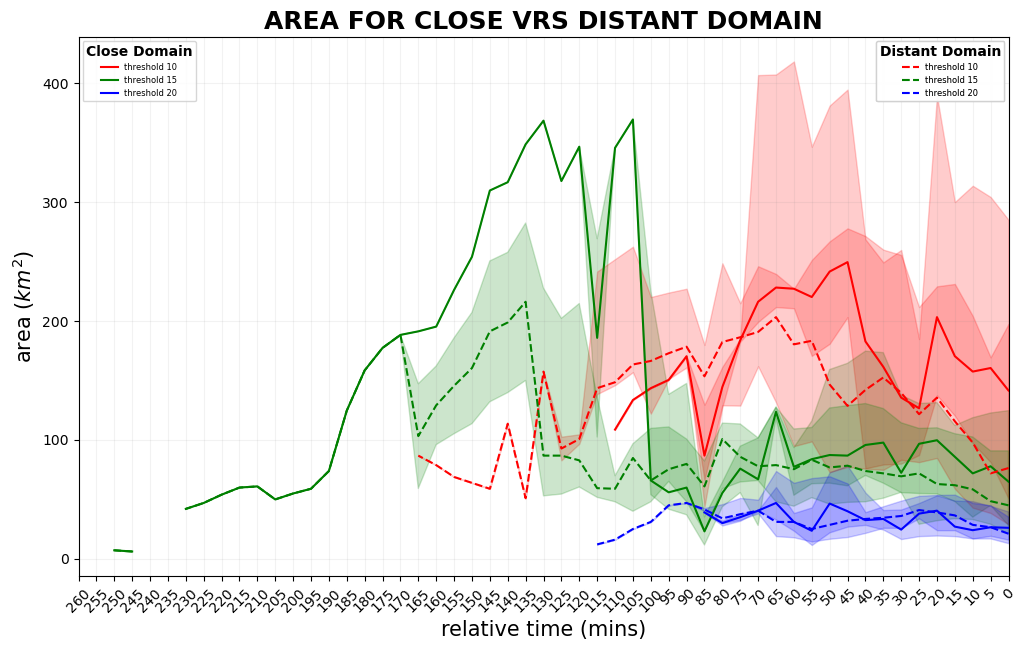

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))

X=np.arange(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']+1), 5)

# for index, cell_ids in enumerate(np.unique(distant_domain_15['cell'])):
#     close_cell_number10 = close_domain_10[close_domain_10['cell'] == cell_ids]
# #     # cell_number15 = first_landfall_threshold_15[first_landfall_threshold_15['cell'] == cell_ids]
# #     # cell_number20 = first_landfall_threshold_20[first_landfall_threshold_20['cell'] == cell_ids]
#     # ax.plot(close_cell_number10['relative-time-to-radar'], close_cell_number10['mean dBZ'])


# close domain
line1, = ax.plot(rel_times_area_close_domain_10, percentiles_50_area_close_domain_10, color='red', label='threshold 10')
line2, = ax.plot(rel_times_area_close_domain_15, percentiles_50_area_close_domain_15, color='green', label='threshold 15')
line3, = ax.plot(rel_times_area_close_domain_20, percentiles_50_area_close_domain_20, color='blue', label='threshold 20')

line4, = ax.plot(rel_times_area_distant_domain_10, percentiles_50_area_distant_domain_10, linestyle='--' ,color='red', label='threshold 10')
line5, = ax.plot(rel_times_area_distant_domain_15, percentiles_50_area_distant_domain_15, linestyle='--' ,color='green', label='threshold 15')
line6, = ax.plot(rel_times_area_distant_domain_20, percentiles_50_area_distant_domain_20, linestyle='--' ,color='blue', label='threshold 20')


# distant domain
ax.fill_between(rel_times_area_close_domain_10, percentiles_25_area_close_domain_10, percentiles_75_area_close_domain_10, alpha=0.2, color='red')
ax.fill_between(rel_times_area_close_domain_15, percentiles_25_area_close_domain_15, percentiles_75_area_close_domain_15, alpha=0.2, color='green')
ax.fill_between(rel_times_area_close_domain_20, percentiles_25_area_close_domain_20, percentiles_75_area_close_domain_20, alpha=0.2, color='blue')

ax.fill_between(rel_times_area_distant_domain_10, percentiles_25_area_distant_domain_10, percentiles_75_area_distant_domain_10, alpha=0.2, color='red')
ax.fill_between(rel_times_area_distant_domain_15, percentiles_25_area_distant_domain_15, percentiles_75_area_distant_domain_15, alpha=0.2, color='green')
ax.fill_between(rel_times_area_distant_domain_20, percentiles_25_area_distant_domain_20, percentiles_75_area_distant_domain_20, alpha=0.2, color='blue')


# # set limit
ax.set_xlim(np.min(distant_domain_15['relative-time-to-LF-distant']), np.mean(distant_domain_15['relative-time-to-LF-distant']))
# # # set xticks and yticks
ax.set_xticks(X)
# # ax.set_yticks(Y)
ax.invert_xaxis();
ax.set_xlabel('relative time (mins)', fontsize=15)
ax.set_ylabel('area $(km^2)$', fontsize=15)
ax.set_title('AREA FOR CLOSE VRS DISTANT DOMAIN', fontweight='bold', fontsize=18)
plt.grid(color='gray', alpha=0.1)
# ax.legend(loc=3, prop={'size':8})




# Create two separate legends with custom font sizes and weights
legend_close = ax.legend(handles=[line1, line2, line3],
                          title="Close Domain",
                          loc='upper left',
                          fontsize=6,  # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(10)  # Custom title fontsize
legend_close.get_title().set_fontweight('bold')  # Custom title fontweight

legend_distant = ax.legend(handles=[line4, line5, line6],
                            title="Distant Domain",
                            loc='upper right',
                            fontsize=6,  # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(10)  # Custom title fontsize
legend_distant.get_title().set_fontweight('bold')  # Custom title fontweight

# Add the first legend manually to the current Axes
ax.add_artist(legend_close)

# Add the second legend
ax.add_artist(legend_distant)


plt.xticks(rotation=45);

# # ax.text(x=5, y=31, s='landfall', fontweight='bold');
fig.savefig('./images/distance-vrs-close-domain/area(close vs. dist)-LF.png', dpi=500, bbox_inches='tight');

## _CALCULATING N_CELLS AS A FUNCTION OF RELATIVE TIME_

In [22]:
close_domain_df10 = close_domain_10.copy()
close_domain_df15 = close_domain_15.copy()
close_domain_df20 = close_domain_20.copy()

# # print('close-domain-10', len(close_domain_10)), print('close-domain-15', len(close_domain_15))

distant_domain_df10 = distant_domain_10.copy()
distant_domain_df15 = distant_domain_15.copy()
distant_domain_df20 = distant_domain_20.copy()

# print('distant-domain-10', len(distant_domain_10)), print('distant-domain-15', len(distant_domain_15))
# print("")
# sort dataframe by relative time -- ascending order
sorting_close_domain_df10 = close_domain_df10.sort_values(by=['relative-time-to-LF-close'])
sorting_close_domain_df15 = close_domain_df15.sort_values(by=['relative-time-to-LF-close'])
sorting_close_domain_df20 = close_domain_df20.sort_values(by=['relative-time-to-LF-close'])
# print("sorting_cd", len(sorting_close_domain_df10)), print("sorting_cd", len(sorting_close_domain_df15))

sorting_distant_domain_df10 = distant_domain_df10.sort_values(by=['relative-time-to-LF-distant'])
sorting_distant_domain_df15 = distant_domain_df15.sort_values(by=['relative-time-to-LF-distant'])
sorting_distant_domain_df20 = distant_domain_df20.sort_values(by=['relative-time-to-LF-distant'])
# # print("sorting_dd", len(sorting_distant_domain_df10)), print("sorting_dd", len(sorting_distant_domain_df15))
# print("")

# get the relative time only
relative_time_close_domain_10 = sorting_close_domain_df10['relative-time-to-LF-close']
relative_time_close_domain_15 = sorting_close_domain_df15['relative-time-to-LF-close']
relative_time_close_domain_20 = sorting_close_domain_df20['relative-time-to-LF-close']
# # print("relative-time-cd", len(relative_time_close_domain_10)), print("relative-time-cd", len(relative_time_close_domain_15))


relative_time_distant_domain_10 = sorting_distant_domain_df10['relative-time-to-LF-distant']
relative_time_distant_domain_15 = sorting_distant_domain_df15['relative-time-to-LF-distant']
relative_time_distant_domain_20 = sorting_distant_domain_df20['relative-time-to-LF-distant']
# print("relative-time-dd", len(relative_time_distant_domain_10)), print("relative-time-dd", len(relative_time_distant_domain_15))
# print("")


# get the number of counts based on the relative time
# closed
number_of_cell_close_domain_10 = relative_time_close_domain_10.value_counts()
relative_times_close_domain_10 = number_of_cell_close_domain_10.index # get relative time
number_cell_close_domain_10 = number_of_cell_close_domain_10.values # the number of cell based on relative time
# print(number_of_cell_close_domain_10)
# print("")
# print(relative_times_close_domain_10)
# print("")
# print(number_cell_close_domain_10)

number_of_cell_close_domain_15 = relative_time_close_domain_15.value_counts()
relative_times_close_domain_15 = number_of_cell_close_domain_15.index # get relative time
number_cell_close_domain_15 = number_of_cell_close_domain_15.values # the number of cell based on relative time
# # print(number_of_cell_close_domain_15)
# print("")
# print(relative_times_close_domain_15)
# print("")
# print(number_cell_close_domain_15)

number_of_cell_close_domain_20 = relative_time_close_domain_20.value_counts()
relative_times_close_domain_20 = number_of_cell_close_domain_20.index # get relative time
number_cell_close_domain_20 = number_of_cell_close_domain_20.values # the number of cell based on relative time
# print(number_of_cell_close_domain_20)
# print("")
# print(relative_times_close_domain_20)
# print("")
# print(number_cell_close_domain_20)

# distant
number_of_cell_distant_domain_10 = relative_time_distant_domain_10.value_counts()
relative_times_distant_domain_10 = number_of_cell_distant_domain_10.index # get relative time
number_cell_distant_domain_10 = number_of_cell_distant_domain_10.values # the number of cell based on relative time


number_of_cell_distant_domain_15 = relative_time_distant_domain_15.value_counts()
relative_times_distant_domain_15 = number_of_cell_distant_domain_15.index # get relative time
number_cell_distant_domain_15 = number_of_cell_distant_domain_15.values # the number of cell based on relative time



number_of_cell_distant_domain_20 = relative_time_distant_domain_20.value_counts()
relative_times_distant_domain_20 = number_of_cell_distant_domain_20.index # get relative time
number_cell_distant_domain_20 = number_of_cell_distant_domain_20.values # the number of cell based on relative time


# # len(relative_times), len(number_cells)
# # all_cells_count_landfall5 = pd.DataFrame(data={'relative time(min)': relative_times5, 
# #                                          'number cells': number_cells5})
# close domain relative to radar
all_cells_count_close_domain_radar_10 = pd.DataFrame(data={'relative time(min)': relative_times_close_domain_10, 
                                         'number cells': number_cell_close_domain_10})

all_cells_count_close_domain_radar_15 = pd.DataFrame(data={'relative time(min)': relative_times_close_domain_15, 
                                         'number cells': number_cell_close_domain_15})


all_cells_count_close_domain_radar_20 = pd.DataFrame(data={'relative time(min)': relative_times_close_domain_20, 
                                         'number cells': number_cell_close_domain_20})


# # distant domain relative to radar
all_cells_count_distant_domain_radar_10 = pd.DataFrame(data={'relative time(min)': relative_times_distant_domain_10, 
                                         'number cells': number_cell_distant_domain_10})


all_cells_count_distant_domain_radar_15 = pd.DataFrame(data={'relative time(min)': relative_times_distant_domain_15, 
                                         'number cells': number_cell_distant_domain_15})

all_cells_count_distant_domain_radar_20 = pd.DataFrame(data={'relative time(min)': relative_times_distant_domain_20, 
                                         'number cells': number_cell_distant_domain_20})

In [23]:
len(all_cells_count_close_domain_radar_10), len(all_cells_count_close_domain_radar_15), len(all_cells_count_close_domain_radar_20),

(23, 53, 18)

In [24]:
len(all_cells_count_distant_domain_radar_10), len(all_cells_count_distant_domain_radar_15), len(all_cells_count_distant_domain_radar_20) 

(34, 53, 24)

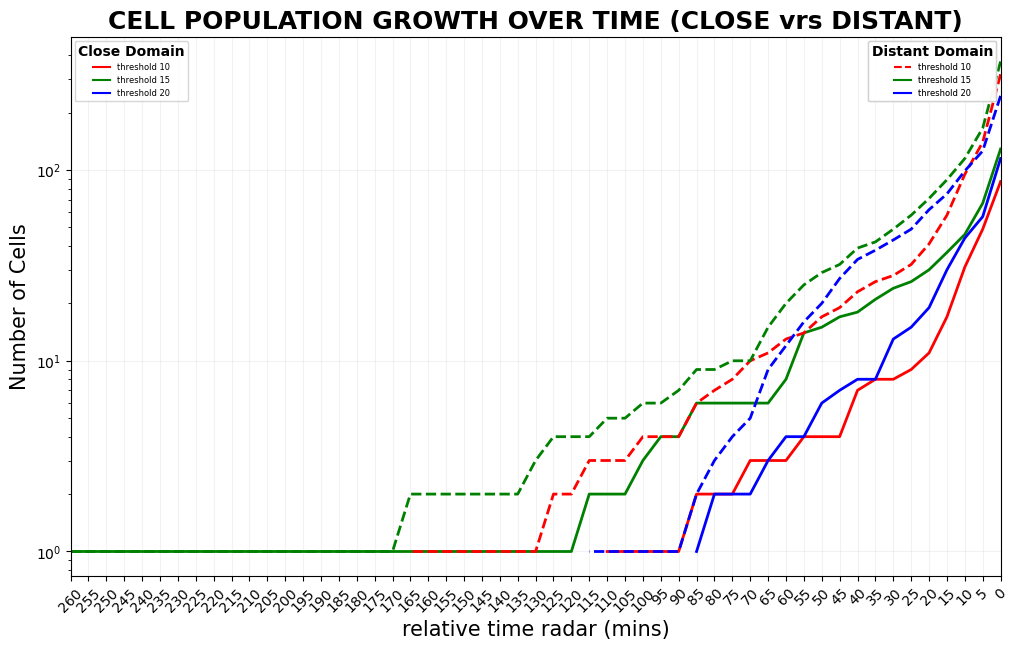

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))
X=np.arange(np.min(all_cells_count_distant_domain_radar_15['relative time(min)']), np.max(all_cells_count_distant_domain_radar_15['relative time(min)']+1), 5)

# # close domain
# ax.plot(all_cells_count_close_domain_radar_10['relative time(min)'], 
#                 np.log10(all_cells_count_close_domain_radar_10['number cells']), color='red', label='Threshold 10', linewidth=2)
# ax.plot(all_cells_count_close_domain_radar_15['relative time(min)'], 
#                 np.log10(all_cells_count_close_domain_radar_15['number cells']),color='green',label='Threshold 15', linewidth=2)
# ax.plot(all_cells_count_close_domain_radar_20['relative time(min)'], 
#                 np.log10(all_cells_count_close_domain_radar_20['number cells']), color='blue', label='Threshold 20', linewidth=2)

ax.plot(all_cells_count_close_domain_radar_10['relative time(min)'], 
                all_cells_count_close_domain_radar_10['number cells'], color='red', label='Threshold 10', linewidth=2)
ax.plot(all_cells_count_close_domain_radar_15['relative time(min)'], 
                all_cells_count_close_domain_radar_15['number cells'],color='green',label='Threshold 15', linewidth=2)
ax.plot(all_cells_count_close_domain_radar_20['relative time(min)'], 
                all_cells_count_close_domain_radar_20['number cells'], color='blue', label='Threshold 20', linewidth=2)

# distant domain
# ax.plot(all_cells_count_distant_domain_radar_10['relative time(min)'], 
#                 np.log10(all_cells_count_distant_domain_radar_10['number cells']), color='red', linestyle='--', label='Threshold 10', linewidth=2)
# ax.plot(all_cells_count_distant_domain_radar_15['relative time(min)'], 
#                 np.log10(all_cells_count_distant_domain_radar_15['number cells']),color='green', linestyle='--', label='Threshold 15', linewidth=2)
# ax.plot(all_cells_count_distant_domain_radar_20['relative time(min)'], 
#                 np.log10(all_cells_count_distant_domain_radar_20['number cells']), color='blue', linestyle='--', label='Threshold 20', linewidth=2)

ax.plot(all_cells_count_distant_domain_radar_10['relative time(min)'], 
                all_cells_count_distant_domain_radar_10['number cells'], color='red', linestyle='--', label='Threshold 10', linewidth=2)
ax.plot(all_cells_count_distant_domain_radar_15['relative time(min)'], 
                all_cells_count_distant_domain_radar_15['number cells'],color='green', linestyle='--', label='Threshold 15', linewidth=2)
ax.plot(all_cells_count_distant_domain_radar_20['relative time(min)'], 
                all_cells_count_distant_domain_radar_20['number cells'], color='blue', linestyle='--', label='Threshold 20', linewidth=2)


ax.set_yscale('log')



# # # Customize the y-tick labels(get original values instead of the log)
# current_ticks = ax.get_yticks()
# new_ticks = [round(np.power(10, tick), 1) for tick in current_ticks]
# # ax.set_yticklabels(new_ticks)


# # # Set the FixedLocator and FixedFormatter for the y-axis
# ax.yaxis.set_major_locator(FixedLocator(current_ticks))
# ax.yaxis.set_major_formatter(FixedFormatter(new_ticks))


# # # set limit
ax.set_xlim(np.min(all_cells_count_distant_domain_radar_15['relative time(min)']), np.max(all_cells_count_distant_domain_radar_15['relative time(min)']))

# # #set xticks and yticks
ax.set_xticks(X) 
ax.invert_xaxis()
ax.set_xlabel('relative time radar (mins)', fontsize=15)
ax.set_ylabel('Number of Cells', fontsize=15)
ax.set_title('CELL POPULATION GROWTH OVER TIME (CLOSE vrs DISTANT)', fontweight='bold', fontsize=18)
# ax.legend()
plt.grid(color='gray', alpha=0.1)
# # # # # move the legend outside the plot area
# ax.legend(loc='upper left')

plt.xticks(rotation=45);


# # legend



# Create two separate legends with custom font sizes and weights
legend_close = ax.legend(handles=[line1, line2, line3],
                          title="Close Domain",
                          loc='upper left',
                          fontsize=6,  # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(10)  # Custom title fontsize
legend_close.get_title().set_fontweight('bold')  # Custom title fontweight

legend_distant = ax.legend(handles=[line4, line2, line3],
                            title="Distant Domain",
                            loc='upper right',
                            fontsize=6,  # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(10)  # Custom title fontsize
legend_distant.get_title().set_fontweight('bold')  # Custom title fontweight

# Add the first legend manually to the current Axes
ax.add_artist(legend_close)

# Add the second legend
ax.add_artist(legend_distant)



# # ax.text(x=4, y=-220, s='landfall', fontweight='bold')
fig.savefig('./images/distance-vrs-close-domain/N-cells(close-vs-distant)-LF.png', dpi=500, bbox_inches='tight');

# Panel Plot

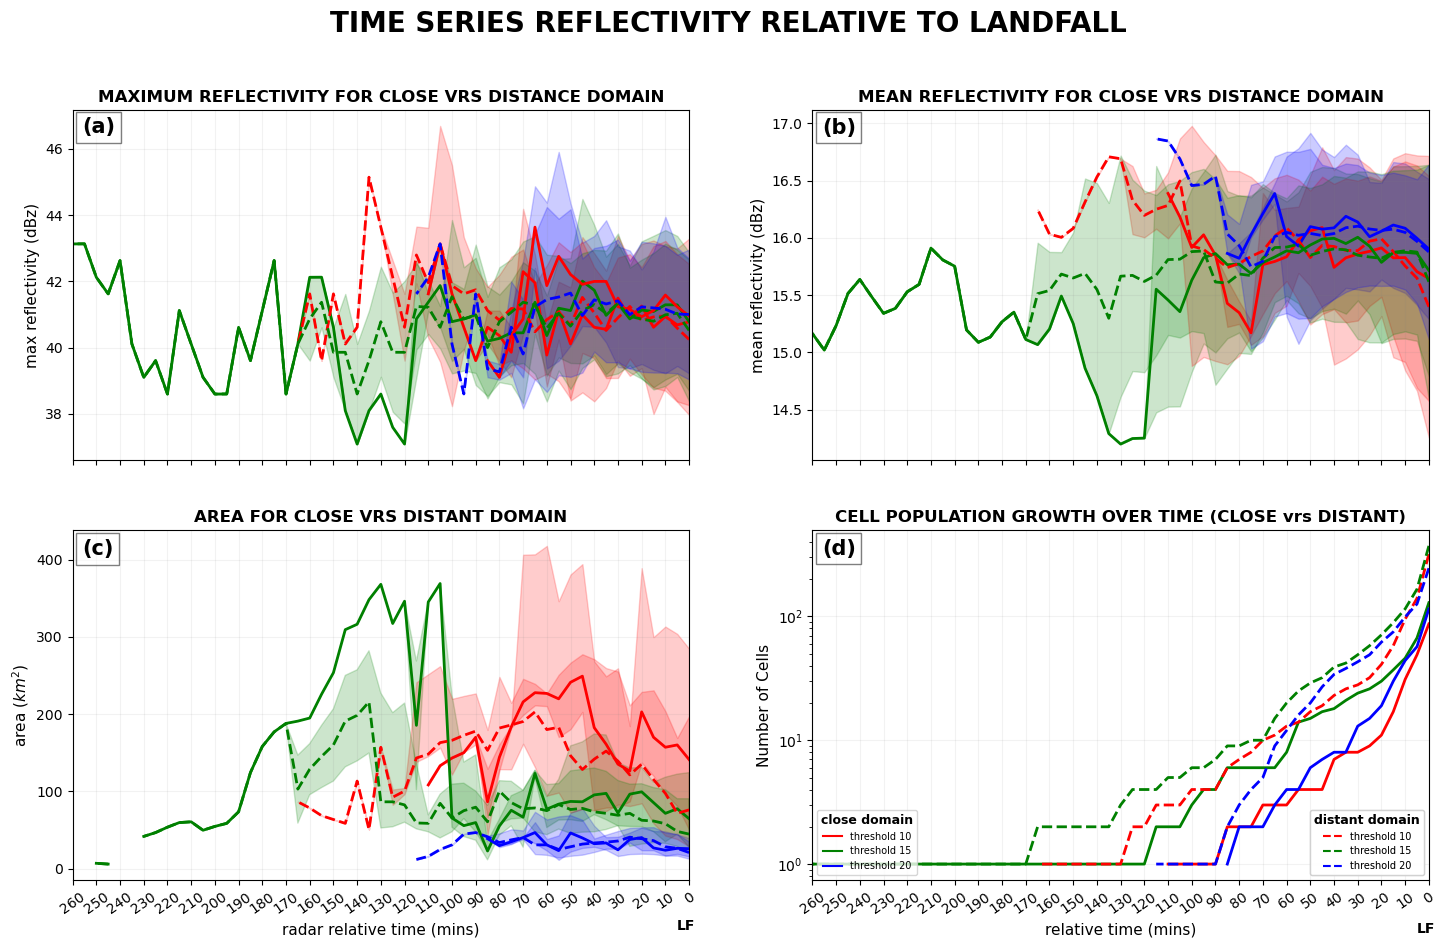

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 10), sharex=True, )
ax = ax.flatten()
X=np.arange(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']+1), 10)

# # MAXIMUM dBZ

# close domain
ax[0].errorbar(rel_times_close_domain_10, mean_max_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[0].errorbar(rel_times_close_domain_15, mean_max_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[0].errorbar(rel_times_close_domain_20, mean_max_dBZ_close_domain_20, fmt='red',label='threshold 20', linewidth=2)

# distant domain
ax[0].errorbar(rel_times_distant_domain_10, mean_max_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_15, mean_max_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_20, mean_max_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)

# close
upper_bound = np.array(mean_max_dBZ_close_domain_10) + np.array(std_max_dBZ_close_domain_10)
lower_bound = np.array(mean_max_dBZ_close_domain_10) - np.array(std_max_dBZ_close_domain_10)
ax[0].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_close_domain_15) + np.array(std_max_dBZ_close_domain_15)
lower_bound = np.array(mean_max_dBZ_close_domain_15) - np.array(std_max_dBZ_close_domain_15)
ax[0].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_close_domain_20) + np.array(std_max_dBZ_close_domain_20)
lower_bound = np.array(mean_max_dBZ_close_domain_20) - np.array(std_max_dBZ_close_domain_20)
ax[0].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_max_dBZ_distant_domain_10) + np.array(std_max_dBZ_distant_domain_10)
lower_bound = np.array(mean_max_dBZ_distant_domain_10) - np.array(std_max_dBZ_distant_domain_10)
ax[0].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_distant_domain_15) + np.array(std_max_dBZ_distant_domain_15)
lower_bound = np.array(mean_max_dBZ_distant_domain_15) - np.array(std_max_dBZ_distant_domain_15)
ax[0].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_distant_domain_20) + np.array(std_max_dBZ_distant_domain_20)
lower_bound = np.array(mean_max_dBZ_distant_domain_20) - np.array(std_max_dBZ_distant_domain_20)
ax[0].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# # set limit
ax[0].set_xlim(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']))
# # # set xticks and yticks
ax[0].set_xticks(X)
# # ax.set_yticks(Y)
ax[0].invert_xaxis();
ax[0].set_ylabel('max reflectivity (dBz)', fontsize=11)
ax[0].set_title('MAXIMUM REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[0].grid(color='gray', alpha=0.1)
ax[0].text(x=256, y=46.47, s='(a)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))



# # MEAN dBZ
# close domain
ax[1].errorbar(rel_times_close_domain_10, mean_mean_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[1].errorbar(rel_times_close_domain_15, mean_mean_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[1].errorbar(rel_times_close_domain_20, mean_mean_dBZ_close_domain_20, fmt='blue',label='threshold 20', linewidth=2)


# distant domain
ax[1].errorbar(rel_times_distant_domain_10, mean_mean_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_15, mean_mean_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_20, mean_mean_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)


# close
upper_bound = np.array(mean_mean_dBZ_close_domain_10) + np.array(std_mean_dBZ_close_domain_10)
lower_bound = np.array(mean_mean_dBZ_close_domain_10) - np.array(std_mean_dBZ_close_domain_10)
ax[1].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_close_domain_15) + np.array(std_mean_dBZ_close_domain_15)
lower_bound = np.array(mean_mean_dBZ_close_domain_15) - np.array(std_mean_dBZ_close_domain_15)
ax[1].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_close_domain_20) + np.array(std_mean_dBZ_close_domain_20)
lower_bound = np.array(mean_mean_dBZ_close_domain_20) - np.array(std_mean_dBZ_close_domain_20)
ax[1].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_mean_dBZ_distant_domain_10) + np.array(std_mean_dBZ_distant_domain_10)
lower_bound = np.array(mean_mean_dBZ_distant_domain_10) - np.array(std_mean_dBZ_distant_domain_10)
ax[1].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_distant_domain_15) + np.array(std_mean_dBZ_distant_domain_15)
lower_bound = np.array(mean_mean_dBZ_distant_domain_15) - np.array(std_mean_dBZ_distant_domain_15)
ax[1].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_distant_domain_20) + np.array(std_mean_dBZ_distant_domain_20)
lower_bound = np.array(mean_mean_dBZ_distant_domain_20) - np.array(std_mean_dBZ_distant_domain_20)
ax[1].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')



# # set limit
# ax[1].set_xlim(np.min(distant_domain_20['relative-time-to-radar']), np.mean(distant_domain_20['relative-time-to-radar']))
# # # set xticks and yticks
ax[1].set_xticks(X)
# # ax.set_yticks(Y)
ax[1].invert_xaxis();
ax[1].set_ylabel('mean reflectivity (dBz)', fontsize=11)
ax[1].set_title('MEAN REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[1].grid(color='gray', alpha=0.1)
ax[1].text(x=256, y=16.91, s='(b)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))


# AREA
# close domain
ax[2].plot(rel_times_area_close_domain_10, percentiles_50_area_close_domain_10, color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_close_domain_15, percentiles_50_area_close_domain_15, color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_close_domain_20, percentiles_50_area_close_domain_20, color='blue', label='threshold 20', linewidth=2)

ax[2].plot(rel_times_area_distant_domain_10, percentiles_50_area_distant_domain_10, linestyle='--' ,color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_15, percentiles_50_area_distant_domain_15, linestyle='--' ,color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_20, percentiles_50_area_distant_domain_20, linestyle='--' ,color='blue', label='threshold 20', linewidth=2)

# distant domain
ax[2].fill_between(rel_times_area_close_domain_10, percentiles_25_area_close_domain_10, percentiles_75_area_close_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_close_domain_15, percentiles_25_area_close_domain_15, percentiles_75_area_close_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_close_domain_20, percentiles_25_area_close_domain_20, percentiles_75_area_close_domain_20, alpha=0.2, color='blue')

ax[2].fill_between(rel_times_area_distant_domain_10, percentiles_25_area_distant_domain_10, percentiles_75_area_distant_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_distant_domain_15, percentiles_25_area_distant_domain_15, percentiles_75_area_distant_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_distant_domain_20, percentiles_25_area_distant_domain_20, percentiles_75_area_distant_domain_20, alpha=0.2, color='blue')


# # set limit
ax[2].set_xticks(X)
# # ax.set_yticks(Y)
ax[2].invert_xaxis()
ax[2].set_facecolor('white')
ax[2].set_xlabel('radar relative time (mins)', fontsize=11)
ax[2].set_ylabel('area $(km^2)$', fontsize=11)
ax[2].set_title('AREA FOR CLOSE VRS DISTANT DOMAIN', fontweight='bold', fontsize=12)
ax[2].grid(color='gray', alpha=0.1)
ax[2].text(x=5, y=-80, s='LF', fontweight='bold')
ax[2].text(x=256, y=406, s='(c)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=35)


# # N - CELLLS
# close domain


ax[3].plot(all_cells_count_close_domain_radar_10['relative time(min)'], 
                all_cells_count_close_domain_radar_10['number cells'], color='red', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_15['relative time(min)'], 
                all_cells_count_close_domain_radar_15['number cells'], color='green', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_20['relative time(min)'], 
                all_cells_count_close_domain_radar_20['number cells'], color='blue', label='Threshold 20', linewidth=2)

# distant domain
ax[3].plot(all_cells_count_distant_domain_radar_10['relative time(min)'], 
                all_cells_count_distant_domain_radar_10['number cells'], color='red', linestyle='--', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_15['relative time(min)'], 
                all_cells_count_distant_domain_radar_15['number cells'], color='green', linestyle='--', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_20['relative time(min)'], 
                all_cells_count_distant_domain_radar_20['number cells'], color='blue', linestyle='--', label='Threshold 20', linewidth=2)

# # # set limit
ax[3].set_xlim(np.min(all_cells_count_distant_domain_radar_15['relative time(min)']), np.max(all_cells_count_distant_domain_radar_15['relative time(min)']))



# # #set xticks and yticks
ax[3].set_xticks(X) 
ax[3].set_facecolor('white')
ax[3].invert_xaxis()
ax[3].set_xlabel('relative time (mins)', fontsize=11)
ax[3].set_ylabel('Number of Cells', fontsize=11)
ax[3].set_title('CELL POPULATION GROWTH OVER TIME (CLOSE vrs DISTANT)', fontweight='bold', fontsize=12)
ax[3].grid(color='gray', alpha=0.1)
# # # # # move the legend outside the plot area
# plt.xticks(rotation=45)


# # Create two separate legends with custom font sizes and weights
legend_close = ax[3].legend(handles=[line1, line2, line3],
                          title="close domain",
                          loc='lower left',
                          fontsize=7,  # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(9)  # Custom title fontsize
legend_close.get_title().set_fontweight('bold')  # Custom title fontweight

legend_distant = ax[3].legend(handles=[line4, line5, line6],
                            title="distant domain",
                            loc='lower right',
                            fontsize=7,  # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(9)  # Custom title fontsize
legend_distant.get_title().set_fontweight('bold')  # Custom title fontweight

# Add the first legend manually to the current Axes
ax[3].add_artist(legend_close)

# Add the second legend
ax[3].add_artist(legend_distant)

ax[3].set_yscale('log')

ax[3].text(x=5, y=0.28, s='LF', fontweight='bold')
ax[3].text(x=256, y=313.99, s='(d)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=35)

fig.suptitle('TIME SERIES REFLECTIVITY RELATIVE TO LANDFALL', fontsize=20, fontweight='bold');

# plt.tight_layout()
fig.savefig('./images/distance-vrs-close-domain/panel-plot-time-series-reflectivity-to-radar-LF.png', dpi=500, bbox_inches='tight')

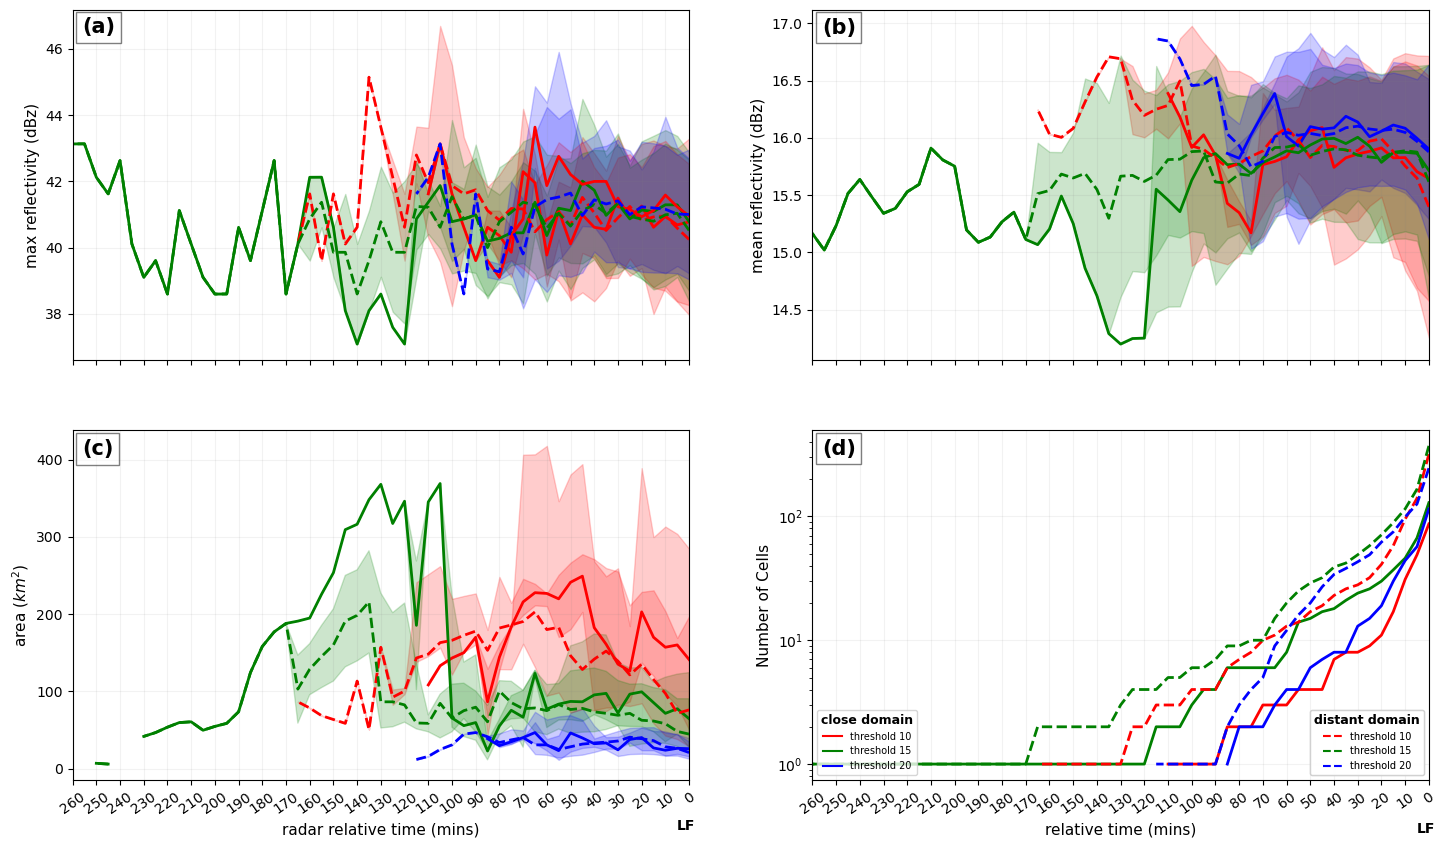

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 10), sharex=True, )
ax = ax.flatten()
X=np.arange(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']+1), 10)

# # MAXIMUM dBZ

# close domain
ax[0].errorbar(rel_times_close_domain_10, mean_max_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[0].errorbar(rel_times_close_domain_15, mean_max_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[0].errorbar(rel_times_close_domain_20, mean_max_dBZ_close_domain_20, fmt='red',label='threshold 20', linewidth=2)

# distant domain
ax[0].errorbar(rel_times_distant_domain_10, mean_max_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_15, mean_max_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_20, mean_max_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)

# close
upper_bound = np.array(mean_max_dBZ_close_domain_10) + np.array(std_max_dBZ_close_domain_10)
lower_bound = np.array(mean_max_dBZ_close_domain_10) - np.array(std_max_dBZ_close_domain_10)
ax[0].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_close_domain_15) + np.array(std_max_dBZ_close_domain_15)
lower_bound = np.array(mean_max_dBZ_close_domain_15) - np.array(std_max_dBZ_close_domain_15)
ax[0].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_close_domain_20) + np.array(std_max_dBZ_close_domain_20)
lower_bound = np.array(mean_max_dBZ_close_domain_20) - np.array(std_max_dBZ_close_domain_20)
ax[0].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_max_dBZ_distant_domain_10) + np.array(std_max_dBZ_distant_domain_10)
lower_bound = np.array(mean_max_dBZ_distant_domain_10) - np.array(std_max_dBZ_distant_domain_10)
ax[0].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_distant_domain_15) + np.array(std_max_dBZ_distant_domain_15)
lower_bound = np.array(mean_max_dBZ_distant_domain_15) - np.array(std_max_dBZ_distant_domain_15)
ax[0].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_distant_domain_20) + np.array(std_max_dBZ_distant_domain_20)
lower_bound = np.array(mean_max_dBZ_distant_domain_20) - np.array(std_max_dBZ_distant_domain_20)
ax[0].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# # set limit
ax[0].set_xlim(np.min(distant_domain_15['relative-time-to-LF-distant']), np.max(distant_domain_15['relative-time-to-LF-distant']))
# # # set xticks and yticks
ax[0].set_xticks(X)
# # ax.set_yticks(Y)
ax[0].invert_xaxis();
ax[0].set_ylabel('max reflectivity (dBz)', fontsize=11)
# ax[0].set_title('MAXIMUM REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[0].grid(color='gray', alpha=0.1)
ax[0].text(x=256, y=46.47, s='(a)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))



# # MEAN dBZ
# close domain
ax[1].errorbar(rel_times_close_domain_10, mean_mean_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[1].errorbar(rel_times_close_domain_15, mean_mean_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[1].errorbar(rel_times_close_domain_20, mean_mean_dBZ_close_domain_20, fmt='blue',label='threshold 20', linewidth=2)


# distant domain
ax[1].errorbar(rel_times_distant_domain_10, mean_mean_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_15, mean_mean_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_20, mean_mean_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)


# close
upper_bound = np.array(mean_mean_dBZ_close_domain_10) + np.array(std_mean_dBZ_close_domain_10)
lower_bound = np.array(mean_mean_dBZ_close_domain_10) - np.array(std_mean_dBZ_close_domain_10)
ax[1].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_close_domain_15) + np.array(std_mean_dBZ_close_domain_15)
lower_bound = np.array(mean_mean_dBZ_close_domain_15) - np.array(std_mean_dBZ_close_domain_15)
ax[1].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_close_domain_20) + np.array(std_mean_dBZ_close_domain_20)
lower_bound = np.array(mean_mean_dBZ_close_domain_20) - np.array(std_mean_dBZ_close_domain_20)
ax[1].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_mean_dBZ_distant_domain_10) + np.array(std_mean_dBZ_distant_domain_10)
lower_bound = np.array(mean_mean_dBZ_distant_domain_10) - np.array(std_mean_dBZ_distant_domain_10)
ax[1].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_distant_domain_15) + np.array(std_mean_dBZ_distant_domain_15)
lower_bound = np.array(mean_mean_dBZ_distant_domain_15) - np.array(std_mean_dBZ_distant_domain_15)
ax[1].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_distant_domain_20) + np.array(std_mean_dBZ_distant_domain_20)
lower_bound = np.array(mean_mean_dBZ_distant_domain_20) - np.array(std_mean_dBZ_distant_domain_20)
ax[1].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')



# # set limit
# ax[1].set_xlim(np.min(distant_domain_20['relative-time-to-radar']), np.mean(distant_domain_20['relative-time-to-radar']))
# # # set xticks and yticks
ax[1].set_xticks(X)
# # ax.set_yticks(Y)
ax[1].invert_xaxis();
ax[1].set_ylabel('mean reflectivity (dBz)', fontsize=11)
# ax[1].set_title('MEAN REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[1].grid(color='gray', alpha=0.1)
ax[1].text(x=256, y=16.91, s='(b)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))


# AREA
# close domain
ax[2].plot(rel_times_area_close_domain_10, percentiles_50_area_close_domain_10, color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_close_domain_15, percentiles_50_area_close_domain_15, color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_close_domain_20, percentiles_50_area_close_domain_20, color='blue', label='threshold 20', linewidth=2)

ax[2].plot(rel_times_area_distant_domain_10, percentiles_50_area_distant_domain_10, linestyle='--' ,color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_15, percentiles_50_area_distant_domain_15, linestyle='--' ,color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_20, percentiles_50_area_distant_domain_20, linestyle='--' ,color='blue', label='threshold 20', linewidth=2)

# distant domain
ax[2].fill_between(rel_times_area_close_domain_10, percentiles_25_area_close_domain_10, percentiles_75_area_close_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_close_domain_15, percentiles_25_area_close_domain_15, percentiles_75_area_close_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_close_domain_20, percentiles_25_area_close_domain_20, percentiles_75_area_close_domain_20, alpha=0.2, color='blue')

ax[2].fill_between(rel_times_area_distant_domain_10, percentiles_25_area_distant_domain_10, percentiles_75_area_distant_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_distant_domain_15, percentiles_25_area_distant_domain_15, percentiles_75_area_distant_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_distant_domain_20, percentiles_25_area_distant_domain_20, percentiles_75_area_distant_domain_20, alpha=0.2, color='blue')


# # set limit
ax[2].set_xticks(X)
# # ax.set_yticks(Y)
ax[2].invert_xaxis()
ax[2].set_facecolor('white')
ax[2].set_xlabel('radar relative time (mins)', fontsize=11)
ax[2].set_ylabel('area $(km^2)$', fontsize=11)
# ax[2].set_title('AREA FOR CLOSE VRS DISTANT DOMAIN', fontweight='bold', fontsize=12)
ax[2].grid(color='gray', alpha=0.1)
ax[2].text(x=5, y=-80, s='LF', fontweight='bold')
ax[2].text(x=256, y=406, s='(c)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=35)


# # N - CELLLS
# close domain


ax[3].plot(all_cells_count_close_domain_radar_10['relative time(min)'], 
                all_cells_count_close_domain_radar_10['number cells'], color='red', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_15['relative time(min)'], 
                all_cells_count_close_domain_radar_15['number cells'], color='green', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_20['relative time(min)'], 
                all_cells_count_close_domain_radar_20['number cells'], color='blue', label='Threshold 20', linewidth=2)

# distant domain
ax[3].plot(all_cells_count_distant_domain_radar_10['relative time(min)'], 
                all_cells_count_distant_domain_radar_10['number cells'], color='red', linestyle='--', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_15['relative time(min)'], 
                all_cells_count_distant_domain_radar_15['number cells'], color='green', linestyle='--', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_20['relative time(min)'], 
                all_cells_count_distant_domain_radar_20['number cells'], color='blue', linestyle='--', label='Threshold 20', linewidth=2)

# # # set limit
ax[3].set_xlim(np.min(all_cells_count_distant_domain_radar_15['relative time(min)']), np.max(all_cells_count_distant_domain_radar_15['relative time(min)']))



# # #set xticks and yticks
ax[3].set_xticks(X) 
ax[3].set_facecolor('white')
ax[3].invert_xaxis()
ax[3].set_xlabel('relative time (mins)', fontsize=11)
ax[3].set_ylabel('Number of Cells', fontsize=11)
# ax[3].set_title('CELL POPULATION GROWTH OVER TIME (CLOSE vrs DISTANT)', fontweight='bold', fontsize=12)
ax[3].grid(color='gray', alpha=0.1)
# # # # # move the legend outside the plot area
# plt.xticks(rotation=45)


# # Create two separate legends with custom font sizes and weights
legend_close = ax[3].legend(handles=[line1, line2, line3],
                          title="close domain",
                          loc='lower left',
                          fontsize=7,  # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(9)  # Custom title fontsize
legend_close.get_title().set_fontweight('bold')  # Custom title fontweight

legend_distant = ax[3].legend(handles=[line4, line5, line6],
                            title="distant domain",
                            loc='lower right',
                            fontsize=7,  # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(9)  # Custom title fontsize
legend_distant.get_title().set_fontweight('bold')  # Custom title fontweight

# Add the first legend manually to the current Axes
ax[3].add_artist(legend_close)

# Add the second legend
ax[3].add_artist(legend_distant)

ax[3].set_yscale('log')

ax[3].text(x=5, y=0.28, s='LF', fontweight='bold')
ax[3].text(x=256, y=313.99, s='(d)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=35);

# fig.suptitle('TIME SERIES REFLECTIVITY RELATIVE TO LANDFALL', fontsize=20, fontweight='bold');

# plt.tight_layout()
fig.savefig('./images/distance-vrs-close-domain/panel-plot-time-series-reflectivity-to-pub-LF.png', dpi=500, bbox_inches='tight')

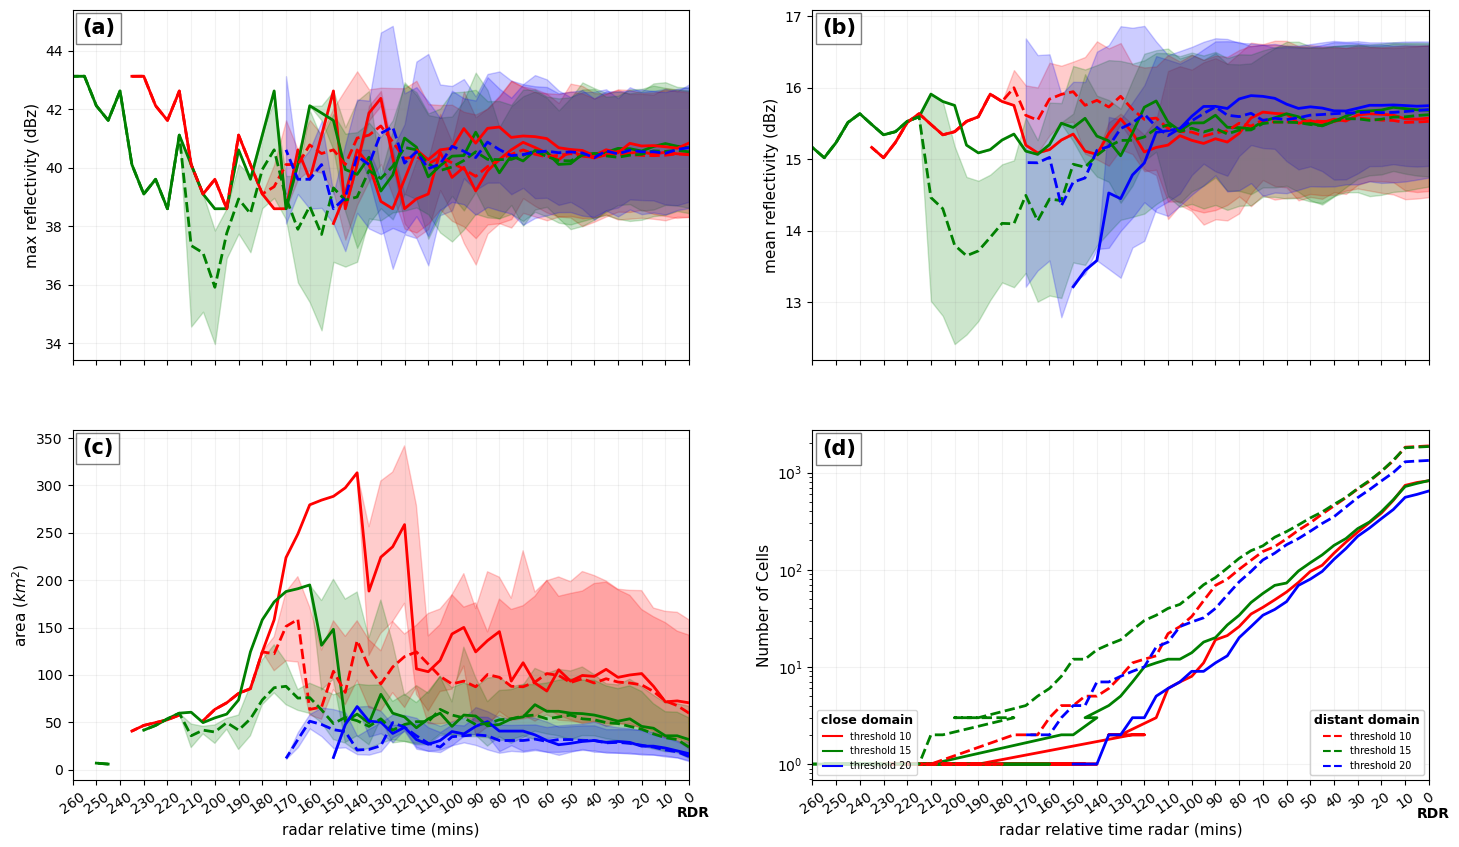

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 10), sharex=True, )
ax = ax.flatten()
X=np.arange(np.min(distant_domain_15['relative-time-to-radar']), np.max(distant_domain_15['relative-time-to-radar']+1), 10)

# # MAXIMUM dBZ

# close domain
ax[0].errorbar(rel_times_close_domain_10, mean_max_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[0].errorbar(rel_times_close_domain_15, mean_max_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[0].errorbar(rel_times_close_domain_20, mean_max_dBZ_close_domain_20, fmt='red',label='threshold 20', linewidth=2)

# distant domain
ax[0].errorbar(rel_times_distant_domain_10, mean_max_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_15, mean_max_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[0].errorbar(rel_times_distant_domain_20, mean_max_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)

# close
upper_bound = np.array(mean_max_dBZ_close_domain_10) + np.array(std_max_dBZ_close_domain_10)
lower_bound = np.array(mean_max_dBZ_close_domain_10) - np.array(std_max_dBZ_close_domain_10)
ax[0].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_close_domain_15) + np.array(std_max_dBZ_close_domain_15)
lower_bound = np.array(mean_max_dBZ_close_domain_15) - np.array(std_max_dBZ_close_domain_15)
ax[0].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_close_domain_20) + np.array(std_max_dBZ_close_domain_20)
lower_bound = np.array(mean_max_dBZ_close_domain_20) - np.array(std_max_dBZ_close_domain_20)
ax[0].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_max_dBZ_distant_domain_10) + np.array(std_max_dBZ_distant_domain_10)
lower_bound = np.array(mean_max_dBZ_distant_domain_10) - np.array(std_max_dBZ_distant_domain_10)
ax[0].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_max_dBZ_distant_domain_15) + np.array(std_max_dBZ_distant_domain_15)
lower_bound = np.array(mean_max_dBZ_distant_domain_15) - np.array(std_max_dBZ_distant_domain_15)
ax[0].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_max_dBZ_distant_domain_20) + np.array(std_max_dBZ_distant_domain_20)
lower_bound = np.array(mean_max_dBZ_distant_domain_20) - np.array(std_max_dBZ_distant_domain_20)
ax[0].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# # set limit
ax[0].set_xlim(np.min(distant_domain_15['relative-time-to-radar']), np.max(distant_domain_15['relative-time-to-radar']))
# # # set xticks and yticks
ax[0].set_xticks(X)
# # ax.set_yticks(Y)
ax[0].invert_xaxis();
ax[0].set_ylabel('max reflectivity (dBz)', fontsize=11)
# ax[0].set_title('MAXIMUM REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[0].grid(color='gray', alpha=0.1)
ax[0].text(x=256, y=44.57, s='(a)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))



# # MEAN dBZ
# close domain
ax[1].errorbar(rel_times_close_domain_10, mean_mean_dBZ_close_domain_10, fmt='red',label='threshold 10', linewidth=2)
ax[1].errorbar(rel_times_close_domain_15, mean_mean_dBZ_close_domain_15, fmt='green',label='threshold 15', linewidth=2)
ax[1].errorbar(rel_times_close_domain_20, mean_mean_dBZ_close_domain_20, fmt='blue',label='threshold 20', linewidth=2)


# distant domain
ax[1].errorbar(rel_times_distant_domain_10, mean_mean_dBZ_distant_domain_10,fmt='red',label='threshold 10', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_15, mean_mean_dBZ_distant_domain_15,fmt='green',label='threshold 15', linestyle='--', linewidth=2)
ax[1].errorbar(rel_times_distant_domain_20, mean_mean_dBZ_distant_domain_20,fmt='blue',label='threshold 20', linestyle='--', linewidth=2)


# close
upper_bound = np.array(mean_mean_dBZ_close_domain_10) + np.array(std_mean_dBZ_close_domain_10)
lower_bound = np.array(mean_mean_dBZ_close_domain_10) - np.array(std_mean_dBZ_close_domain_10)
ax[1].fill_between(rel_times_close_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_close_domain_15) + np.array(std_mean_dBZ_close_domain_15)
lower_bound = np.array(mean_mean_dBZ_close_domain_15) - np.array(std_mean_dBZ_close_domain_15)
ax[1].fill_between(rel_times_close_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_close_domain_20) + np.array(std_mean_dBZ_close_domain_20)
lower_bound = np.array(mean_mean_dBZ_close_domain_20) - np.array(std_mean_dBZ_close_domain_20)
ax[1].fill_between(rel_times_close_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')


# distant
upper_bound = np.array(mean_mean_dBZ_distant_domain_10) + np.array(std_mean_dBZ_distant_domain_10)
lower_bound = np.array(mean_mean_dBZ_distant_domain_10) - np.array(std_mean_dBZ_distant_domain_10)
ax[1].fill_between(rel_times_distant_domain_10, upper_bound, lower_bound, alpha=0.2, color='red')

upper_bound = np.array(mean_mean_dBZ_distant_domain_15) + np.array(std_mean_dBZ_distant_domain_15)
lower_bound = np.array(mean_mean_dBZ_distant_domain_15) - np.array(std_mean_dBZ_distant_domain_15)
ax[1].fill_between(rel_times_distant_domain_15, upper_bound, lower_bound, alpha=0.2, color='green')

upper_bound = np.array(mean_mean_dBZ_distant_domain_20) + np.array(std_mean_dBZ_distant_domain_20)
lower_bound = np.array(mean_mean_dBZ_distant_domain_20) - np.array(std_mean_dBZ_distant_domain_20)
ax[1].fill_between(rel_times_distant_domain_20, upper_bound, lower_bound, alpha=0.2, color='blue')



# # set limit
# ax[1].set_xlim(np.min(distant_domain_20['relative-time-to-radar']), np.mean(distant_domain_20['relative-time-to-radar']))
# # # set xticks and yticks
ax[1].set_xticks(X)
# # ax.set_yticks(Y)
ax[1].invert_xaxis();
ax[1].set_ylabel('mean reflectivity (dBz)', fontsize=11)
# ax[1].set_title('MEAN REFLECTIVITY FOR CLOSE VRS DISTANCE DOMAIN', fontweight='bold', fontsize=12)
ax[1].grid(color='gray', alpha=0.1)
ax[1].text(x=256, y=16.75, s='(b)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))


# AREA
# close domain
ax[2].plot(rel_times_area_close_domain_10, percentiles_50_area_close_domain_10, color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_close_domain_15, percentiles_50_area_close_domain_15, color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_close_domain_20, percentiles_50_area_close_domain_20, color='blue', label='threshold 20', linewidth=2)

ax[2].plot(rel_times_area_distant_domain_10, percentiles_50_area_distant_domain_10, linestyle='--' ,color='red', label='threshold 10', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_15, percentiles_50_area_distant_domain_15, linestyle='--' ,color='green', label='threshold 15', linewidth=2)
ax[2].plot(rel_times_area_distant_domain_20, percentiles_50_area_distant_domain_20, linestyle='--' ,color='blue', label='threshold 20', linewidth=2)

# distant domain
ax[2].fill_between(rel_times_area_close_domain_10, percentiles_25_area_close_domain_10, percentiles_75_area_close_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_close_domain_15, percentiles_25_area_close_domain_15, percentiles_75_area_close_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_close_domain_20, percentiles_25_area_close_domain_20, percentiles_75_area_close_domain_20, alpha=0.2, color='blue')

ax[2].fill_between(rel_times_area_distant_domain_10, percentiles_25_area_distant_domain_10, percentiles_75_area_distant_domain_10, alpha=0.2, color='red')
ax[2].fill_between(rel_times_area_distant_domain_15, percentiles_25_area_distant_domain_15, percentiles_75_area_distant_domain_15, alpha=0.2, color='green')
ax[2].fill_between(rel_times_area_distant_domain_20, percentiles_25_area_distant_domain_20, percentiles_75_area_distant_domain_20, alpha=0.2, color='blue')


# # set limit
ax[2].set_xticks(X)
# # ax.set_yticks(Y)
ax[2].invert_xaxis()
ax[2].set_facecolor('white')
ax[2].set_xlabel('radar relative time (mins)', fontsize=11)
ax[2].set_ylabel('area $(km^2)$', fontsize=11)
# ax[2].set_title('AREA FOR CLOSE VRS DISTANT DOMAIN', fontweight='bold', fontsize=12)
ax[2].grid(color='gray', alpha=0.1)
ax[2].text(x=5, y=-50, s='RDR', fontweight='bold')
ax[2].text(x=256, y=333, s='(c)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=35)


# # N - CELLLS
# close domain


ax[3].plot(all_cells_count_close_domain_radar_10['relative time(min)'], 
                all_cells_count_close_domain_radar_10['number cells'], color='red', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_15['relative time(min)'], 
                all_cells_count_close_domain_radar_15['number cells'], color='green', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_close_domain_radar_20['relative time(min)'], 
                all_cells_count_close_domain_radar_20['number cells'], color='blue', label='Threshold 20', linewidth=2)

# distant domain
ax[3].plot(all_cells_count_distant_domain_radar_10['relative time(min)'], 
                all_cells_count_distant_domain_radar_10['number cells'], color='red', linestyle='--', label='Threshold 10', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_15['relative time(min)'], 
                all_cells_count_distant_domain_radar_15['number cells'], color='green', linestyle='--', label='Threshold 15', linewidth=2)

ax[3].plot(all_cells_count_distant_domain_radar_20['relative time(min)'], 
                all_cells_count_distant_domain_radar_20['number cells'], color='blue', linestyle='--', label='Threshold 20', linewidth=2)

# # # set limit
ax[3].set_xlim(np.min(all_cells_count_distant_domain_radar_15['relative time(min)']), np.max(all_cells_count_distant_domain_radar_15['relative time(min)']))



# # #set xticks and yticks
ax[3].set_xticks(X) 
ax[3].set_facecolor('white')
ax[3].invert_xaxis()
ax[3].set_xlabel('radar relative time radar (mins)', fontsize=11)
ax[3].set_ylabel('Number of Cells', fontsize=11)
# ax[3].set_title('CELL POPULATION GROWTH OVER TIME (CLOSE vrs DISTANT)', fontweight='bold', fontsize=12)
ax[3].grid(color='gray', alpha=0.1)
# # # # # move the legend outside the plot area
# plt.xticks(rotation=45)


# # Create two separate legends with custom font sizes and weights
legend_close = ax[3].legend(handles=[line1, line2, line3],
                          title="close domain",
                          loc='lower left',
                          fontsize=7,  # Custom label fontsize
                          )
legend_close.get_title().set_fontsize(9)  # Custom title fontsize
legend_close.get_title().set_fontweight('bold')  # Custom title fontweight

legend_distant = ax[3].legend(handles=[line4, line5, line6],
                            title="distant domain",
                            loc='lower right',
                            fontsize=7,  # Custom label fontsize
                            )
legend_distant.get_title().set_fontsize(9)  # Custom title fontsize
legend_distant.get_title().set_fontweight('bold')  # Custom title fontweight

# Add the first legend manually to the current Axes
ax[3].add_artist(legend_close)

# Add the second legend
ax[3].add_artist(legend_distant)

ax[3].set_yscale('log')

ax[3].text(x=5, y=0.28, s='RDR', fontweight='bold')
ax[3].text(x=256, y=1510.99, s='(d)', fontweight='bold', fontsize=15, bbox = dict(facecolor = 'white', alpha = 0.5))
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=35);

# fig.suptitle('TIME SERIES REFLECTIVITY RELATIVE TO RADAR', fontsize=20, fontweight='bold');

# plt.tight_layout()
fig.savefig('./images/distance-vrs-close-domain/pub-panel-plot-time-series-reflectivity-to-radar.png', dpi=500, bbox_inches='tight')